This script reads experimental results derived from EC072 progrenesis analysis.

Data available is both normalized and raw. Visualize both and decide.

B11 and B12 are two batches of experiment 1
B21 and B22 are two batches of experiment 2

It is better the normalized by Progenesis, move forward with that one.

In [1]:
import pandas, numpy, seaborn

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [4]:
experiment_one_input_file = '/home/adrian/projects/vigur/data/lipidomics/072/progenesis/HPMVEC_POSB1_1andB1_2.csv'
experiment_two_input_file = '/home/adrian/projects/vigur/data/lipidomics/072/progenesis/HPMVEC_POSB2_1andB2_2.csv'

metadata_file = '/home/adrian/projects/vigur/data/lipidomics/072/xcms/pos/EC-072 SAMPLE LIST_BATCHES_FORLCMS_INTRA_Lipidomics_FINAL_23032022.xlsx'

# read information

## 2.1. read data

In [5]:
df = pandas.read_csv(experiment_one_input_file, skiprows=2, index_col=0)
print(df.shape)
df.head()

(492, 208)


,Neutral mass (Da),m/z,Charge,Retention time (min),Chromatographic peak width (min),Identifications,Anova (p),q Value,Max Fold Change,Highest Mean,...,Accepted Compound ID,Accepted Description,Adducts,Formula,Score,Fragmentation Score,Mass Error (ppm),Isotope Similarity,Retention Time Error (mins),Compound Link
Compound,,,,,,,,,,,,,,,,,,,,,
4.32_600.2622m/z,NaN,600.262199,1,4.318533,0.064850,0,0.0,0.0,38373.851947,POS_072-47_5 µM nor_4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.17_319.1463m/z,NaN,319.146338,1,2.172350,0.205817,0,0.0,0.0,6885.376378,POS_072-38_0 µM_0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.29_300.9931m/z,NaN,300.993056,1,2.286283,0.249517,0,0.0,0.0,3725.864457,POS_072-60_5 µM nor_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.84_338.3429m/z,NaN,338.342896,1,4.844133,0.682783,0,0.0,0.0,456.265724,POS_072-68_TNFa_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.49_153.1628m/z,NaN,153.162806,1,4.486533,0.406233,0,0.0,0.0,396.227124,POS_072-41_0µM_4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2. read metadata

In [6]:
metadata = pandas.read_excel(metadata_file, sheet_name='Master Sample List POS', index_col='File')
metadata.head()

,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000094,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000095,Pool,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000096,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000097,POS_072-153_5 µM epi:nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-153,2.0,24.0,5 µM epi:nor,1.0,C,3.33*10^5,333000.0,2.0,B2_1,POS
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS


# select the normalized data

Samples 285 to 405 are the appropriate.

In [7]:
normalized_data = df.iloc[:, 116:182]
print(list(normalized_data.columns)[:10])
print(list(normalized_data.columns)[-10:])
print(normalized_data.shape)
normalized_data.head()

['EC72_Lipidomics_000285.1', 'EC72_Lipidomics_000361.1', 'EC72_Lipidomics_000286.1', 'EC72_Lipidomics_000362.1', 'EC72_Lipidomics_000287.1', 'EC72_Lipidomics_000363.1', 'EC72_Lipidomics_000288.1', 'EC72_Lipidomics_000364.1', 'EC72_Lipidomics_000289.1', 'EC72_Lipidomics_000365.1']
['EC72_Lipidomics_000325.1', 'EC72_Lipidomics_000401.1', 'EC72_Lipidomics_000326.1', 'EC72_Lipidomics_000402.1', 'EC72_Lipidomics_000327.1', 'EC72_Lipidomics_000403.1', 'EC72_Lipidomics_000328.1', 'EC72_Lipidomics_000404.1', 'EC72_Lipidomics_000329.1', 'EC72_Lipidomics_000405.1']
(492, 66)


,EC72_Lipidomics_000285.1,EC72_Lipidomics_000361.1,EC72_Lipidomics_000286.1,EC72_Lipidomics_000362.1,EC72_Lipidomics_000287.1,EC72_Lipidomics_000363.1,EC72_Lipidomics_000288.1,EC72_Lipidomics_000364.1,EC72_Lipidomics_000289.1,EC72_Lipidomics_000365.1,...,EC72_Lipidomics_000325.1,EC72_Lipidomics_000401.1,EC72_Lipidomics_000326.1,EC72_Lipidomics_000402.1,EC72_Lipidomics_000327.1,EC72_Lipidomics_000403.1,EC72_Lipidomics_000328.1,EC72_Lipidomics_000404.1,EC72_Lipidomics_000329.1,EC72_Lipidomics_000405.1
Compound,,,,,,,,,,,,,,,,,,,,,
4.32_600.2622m/z,1.503853e+04,3.585795e+04,8.226067e+03,3.096348e+04,6.921453e+03,2.883611e+04,3.791246e+03,3.362701e+04,6.539146e+03,2.562333e+04,...,3.326331e+04,4.600315e+03,1.200662e+04,2.893826e+03,5.879966e+03,4.181855e+03,5.728348e+03,3.016004e+03,5.686265e+03,4.881573e+03
2.17_319.1463m/z,1.288034e+03,1.333828e+03,1.282699e+03,2.848441e+03,1.165555e+03,2.104417e+03,1.328033e+03,1.648260e+03,1.115902e+03,1.657810e+03,...,1.690405e+03,5.441955e+02,1.678914e+03,6.983154e+02,3.729349e+02,5.153098e+02,8.770228e+02,6.902784e+02,8.159520e+02,6.075033e+02
2.29_300.9931m/z,1.244779e+06,3.116948e+06,1.101333e+06,3.159582e+06,1.086979e+06,3.184060e+06,1.339689e+06,3.032499e+06,6.158386e+05,2.333550e+06,...,3.759011e+06,7.417156e+05,1.633588e+06,3.600662e+05,8.044292e+05,7.646186e+05,8.399439e+05,6.837611e+05,9.169591e+05,7.594144e+05
4.84_338.3429m/z,6.563024e+07,6.138572e+07,2.023473e+07,9.613460e+07,1.842224e+07,1.025789e+08,2.421857e+07,8.529459e+07,1.913263e+07,8.867277e+07,...,2.359989e+07,1.336374e+07,1.689868e+07,9.961173e+06,1.067604e+07,1.003655e+07,1.597272e+07,1.340942e+07,1.773873e+07,1.377719e+07
4.49_153.1628m/z,2.852548e+04,3.150327e+04,2.953627e+03,1.817930e+04,6.829981e+03,3.361542e+04,3.243434e+02,3.415653e+03,4.365433e+03,1.850709e+04,...,1.314168e+04,1.206846e+03,6.002222e+04,1.824050e+04,5.360671e+02,4.475455e+01,2.345210e+03,1.294949e+03,3.633525e+03,2.032140e+03


In [8]:
rosetta = {}
original_column_names = list(normalized_data.columns)
new_column_names = [element.split('.1')[0] for element in original_column_names]
for i in range(len(original_column_names)):
    rosetta[original_column_names[i]] = new_column_names[i]
normalized_data.rename(columns=rosetta, inplace=True)

In [9]:
log_df = numpy.log10(normalized_data+1)
log_df.head()

,EC72_Lipidomics_000285,EC72_Lipidomics_000361,EC72_Lipidomics_000286,EC72_Lipidomics_000362,EC72_Lipidomics_000287,EC72_Lipidomics_000363,EC72_Lipidomics_000288,EC72_Lipidomics_000364,EC72_Lipidomics_000289,EC72_Lipidomics_000365,...,EC72_Lipidomics_000325,EC72_Lipidomics_000401,EC72_Lipidomics_000326,EC72_Lipidomics_000402,EC72_Lipidomics_000327,EC72_Lipidomics_000403,EC72_Lipidomics_000328,EC72_Lipidomics_000404,EC72_Lipidomics_000329,EC72_Lipidomics_000405
Compound,,,,,,,,,,,,,,,,,,,,,
4.32_600.2622m/z,4.177234,4.554598,3.915245,4.490864,3.840260,4.459952,3.578896,4.526701,3.815587,4.408653,...,4.521978,3.662882,4.079457,3.461623,3.769449,3.621473,3.758105,3.479576,3.754903,3.688649
2.17_319.1463m/z,3.110264,3.125425,3.108463,3.454760,3.066905,3.323338,3.123536,3.217289,3.048015,3.219797,...,3.228248,2.736552,3.225287,2.844673,2.572796,2.712910,2.943506,2.839653,2.912197,2.784263
2.29_300.9931m/z,6.095092,6.493730,6.041919,6.499630,6.036222,6.502981,6.127004,6.481801,5.789468,6.368017,...,6.575074,5.870238,6.213143,5.556384,5.905488,5.883445,5.924251,5.834905,5.962350,5.880479
4.84_338.3429m/z,7.817104,7.788067,7.306098,7.982880,7.265343,8.011058,7.384148,7.930921,7.281775,7.947790,...,7.372910,7.125928,7.227853,6.998311,7.028410,7.001585,7.203379,7.127410,7.248923,7.139161
4.49_153.1628m/z,4.455248,4.498369,3.470503,4.259601,3.834483,4.526551,2.512342,3.533601,3.640127,4.267362,...,4.118684,3.082012,4.778319,4.261060,2.730029,1.660434,3.370367,3.112588,3.560448,3.308167


# visualization before QN

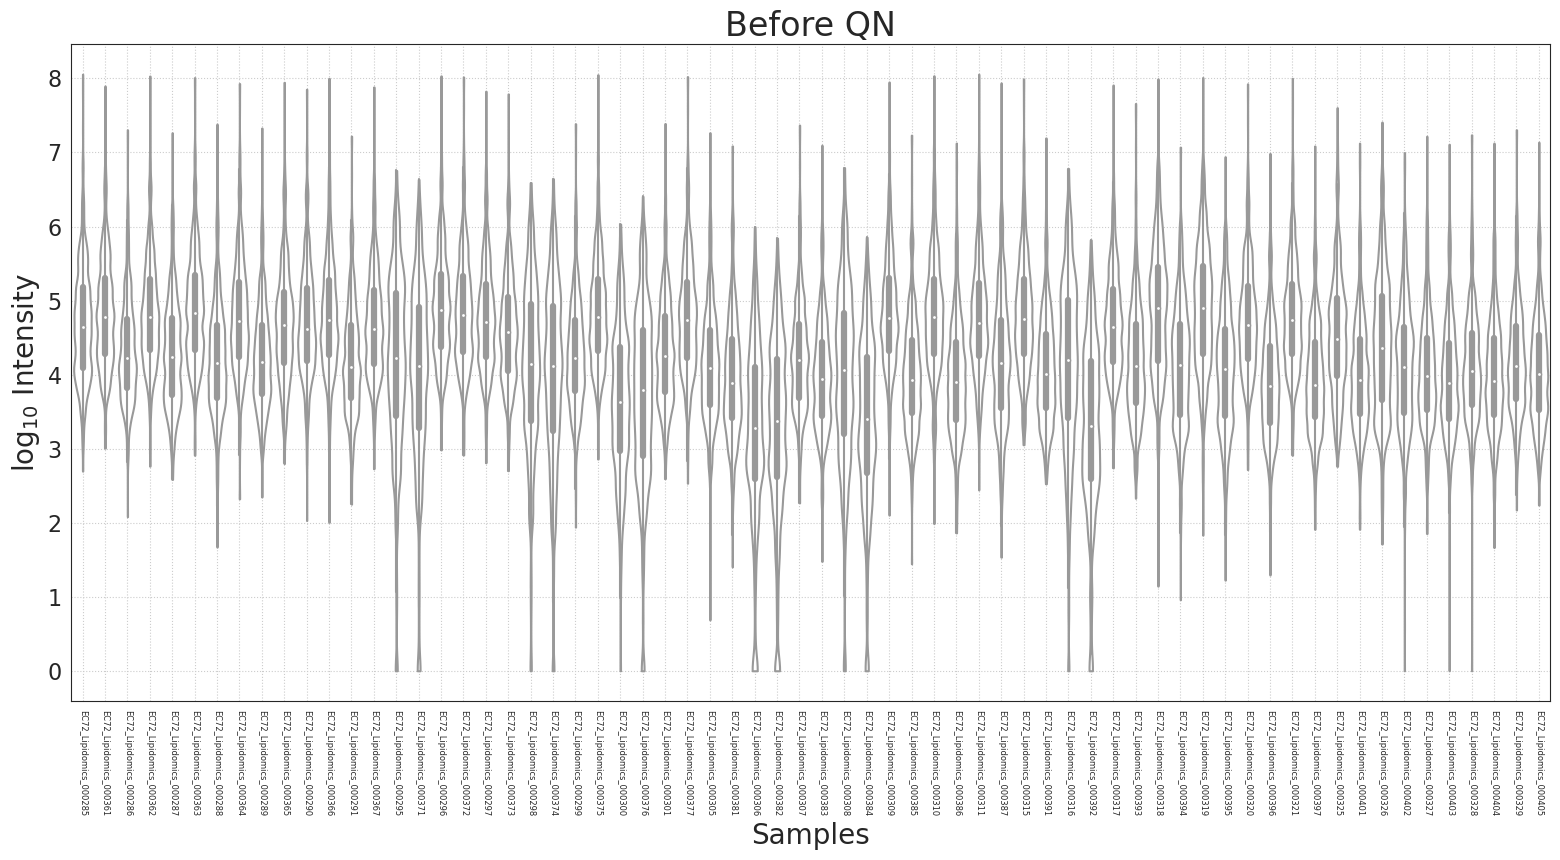

In [10]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log_df, cut=0, bw=.15, scale="count", color='white')
g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='Before QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

variance explained [0.57463433 0.25634645]
(66, 2)


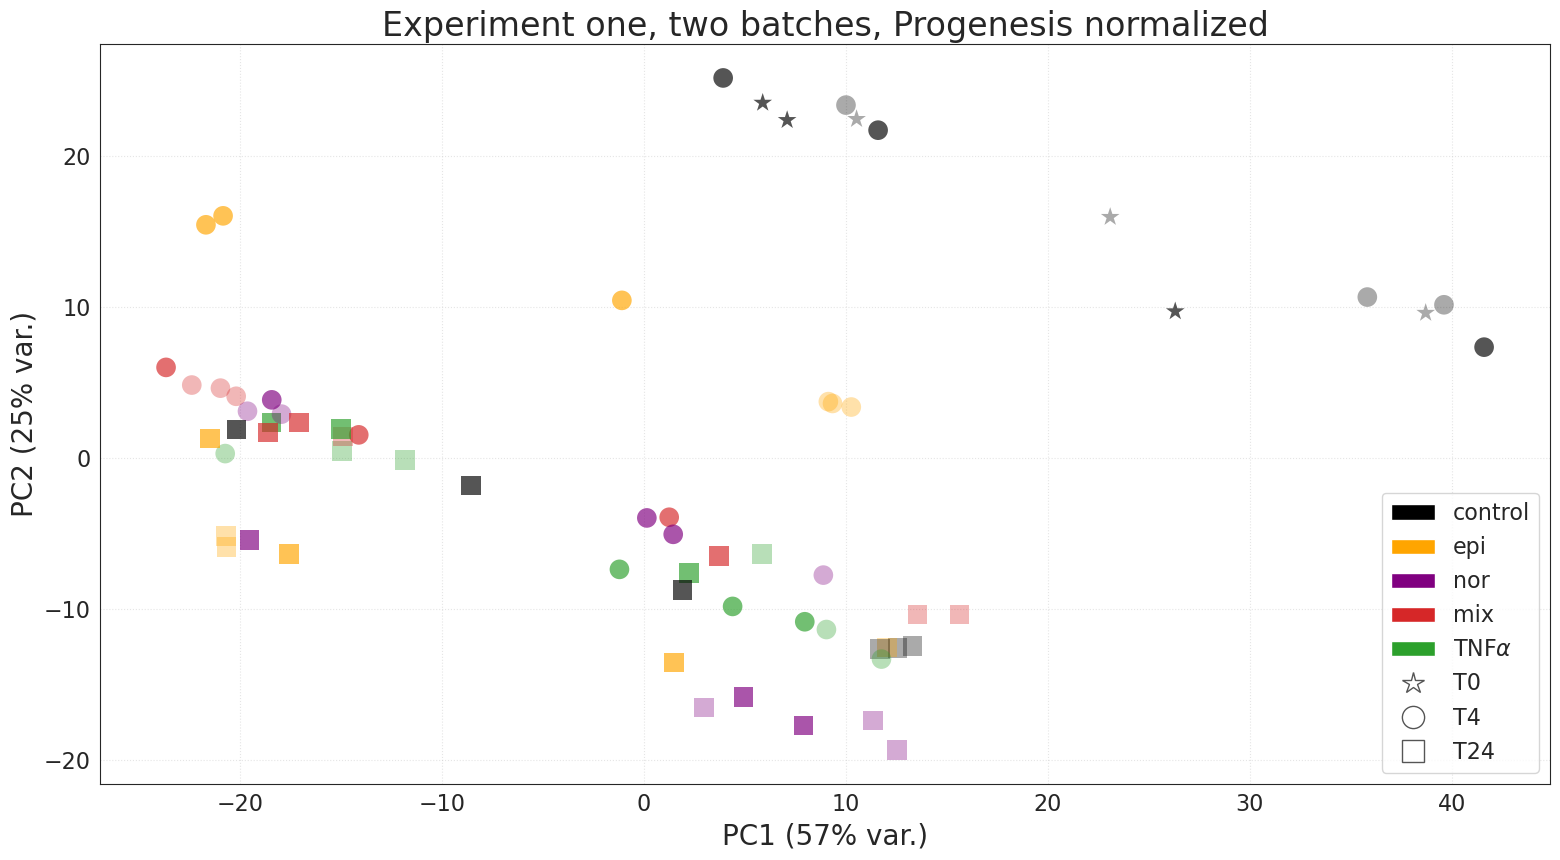

In [11]:
pca_data = log_df.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    #print(batchID)
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment one, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [12]:
# consider seeing the effect of quantile normalization, build volcano plots and then venn diagrams for n-1 responding features (three out of four)

# quantile normalization

In [13]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log_df.values, axis=0), 
                             index=log_df.index, 
                             columns=log_df.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log_df.rank(method="min").stack().astype(int).map(df_mean).unstack()

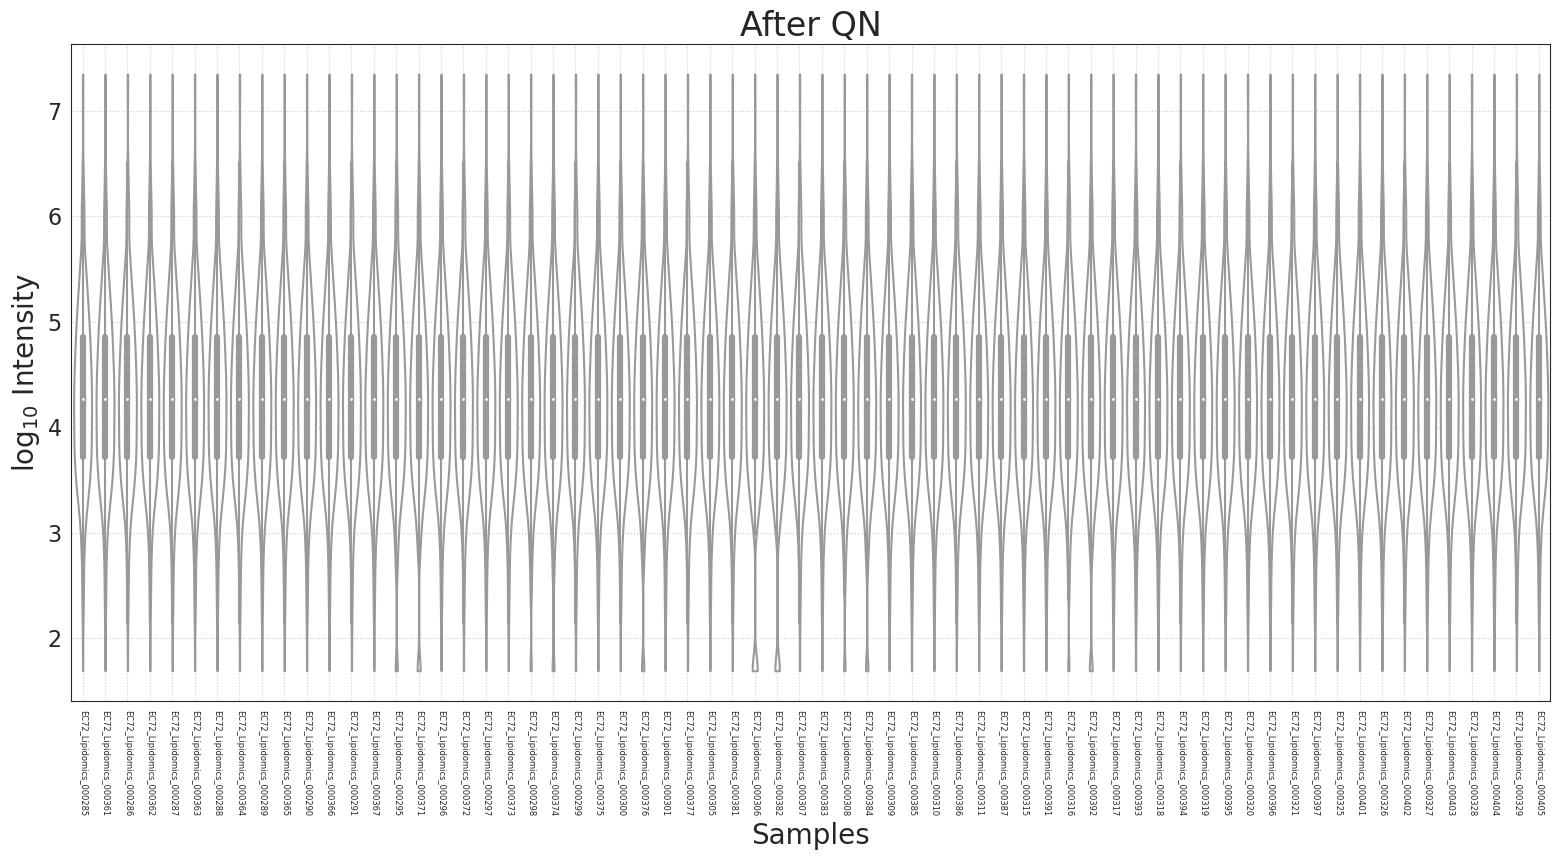

In [14]:
seaborn.set_style("white")
g = seaborn.violinplot(data=df_qn, cut=0, bw=.15, scale="count", color='white')
g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='After QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# visualization after QN

variance explained [0.46455847 0.09923925]
(66, 2)


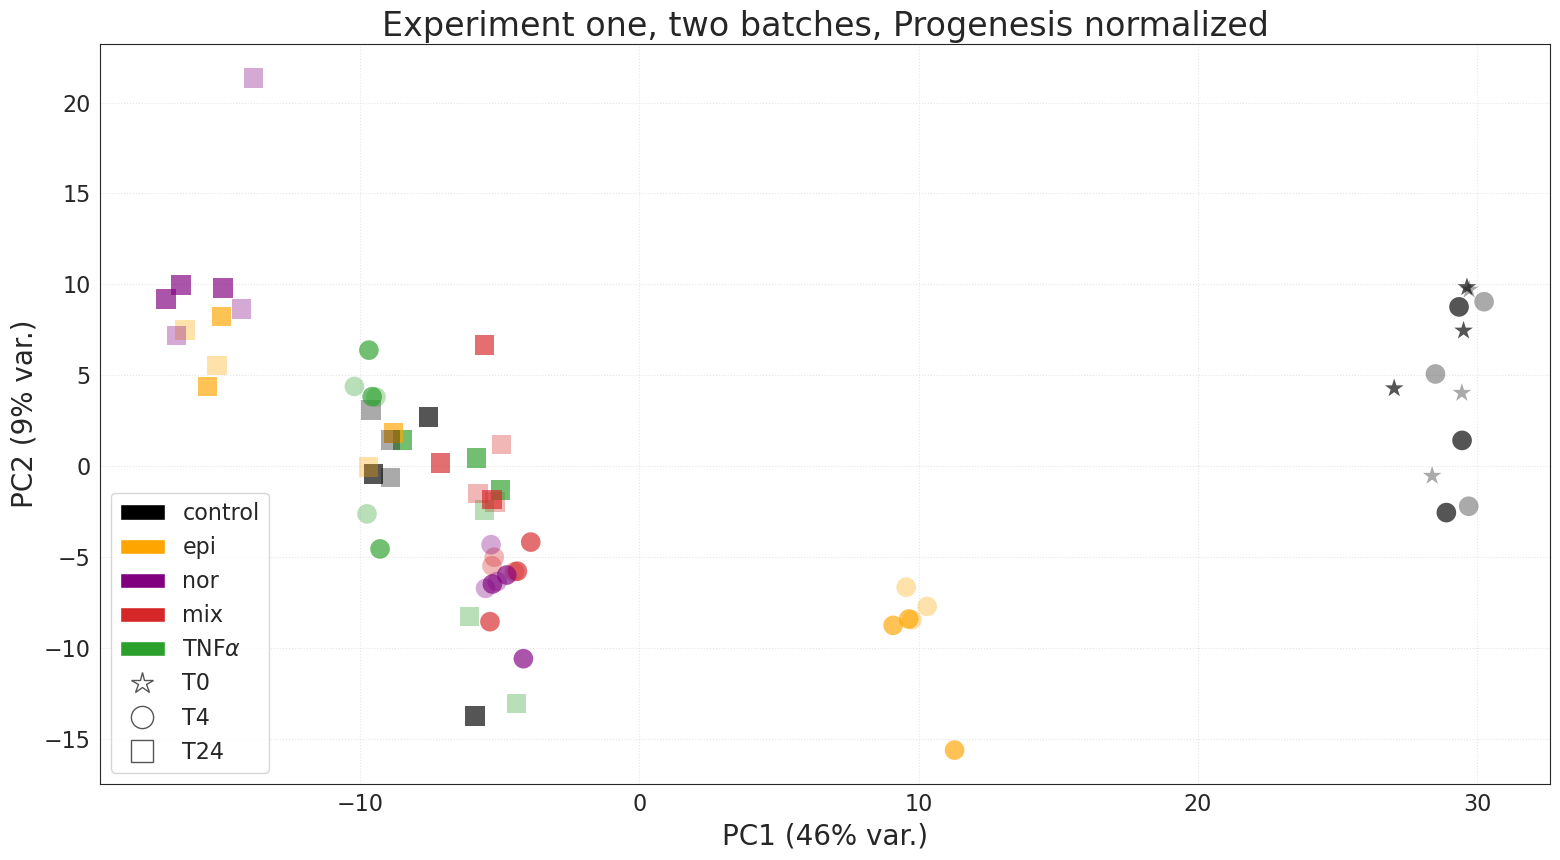

In [15]:
pca_data = df_qn.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    #print(batchID)
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment one, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()